In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bikes = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/bikes_rent.csv'))

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
titan = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv', sep=';'))

In [15]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,0,S


In [12]:
cars = pd.DataFrame(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None,
                               na_values='?')).fillna(0)

In [13]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# веществ признаки, kvadratichnuye i vyshe

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
pf = PolynomialFeatures()

In [20]:
bikes_pf = pf.fit_transform(bikes[['atemp', 'humidity', 'windspeed']])

In [21]:
# vziali 3 priznaka -- poluchili 10
# interaction_only = True -- ne dobavliayet stepeni
bikes_pf.shape

(10886, 10)

In [22]:
bikes = bikes.drop(['atemp', 'humidity', 'windspeed'], axis=1)

In [24]:
x = pd.DataFrame(bikes_pf, index=bikes.index)

In [29]:
bikes = pd.concat([bikes, x], axis=1)

In [31]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,...,0,1,2,3,4,5,6,7,8,9
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,3.0,13.0,16.0,1.0,...,1.0,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,8.0,32.0,40.0,1.0,...,1.0,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,5.0,27.0,32.0,1.0,...,1.0,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,3.0,10.0,13.0,1.0,...,1.0,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,0.0,1.0,1.0,1.0,...,1.0,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0


In [ ]:
# nelineynuye transformacii

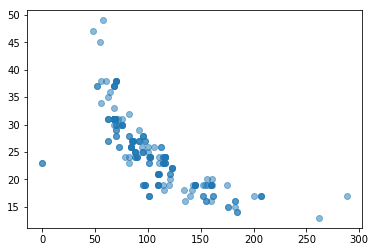

In [33]:
# 23 -- cena mashini
plt.scatter(cars[21], cars[23], alpha=0.5)

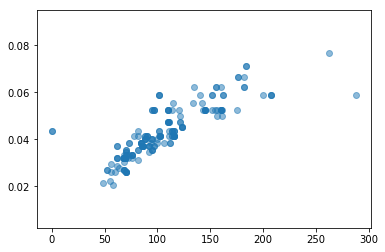

In [34]:
plt.scatter(cars[21], 1/cars[23], alpha=0.5)

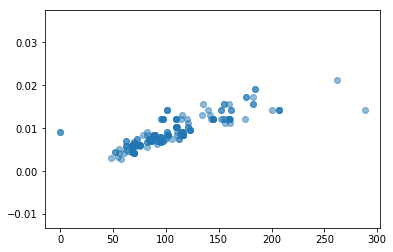

In [37]:
plt.scatter(cars[21], 1/cars[23]**1.5, alpha=0.5)

In [38]:
cars[24] = 1/cars[23]**1.5

In [ ]:
# binarizaciya

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

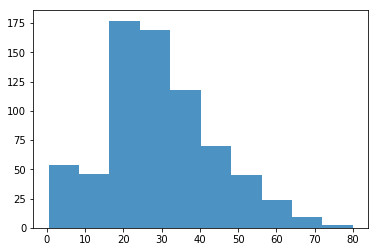

In [42]:
plt.hist(titan['Age'].dropna(), alpha=0.8)

In [43]:
titan['BinAge'] = titan['Age'] < 20

In [ ]:
# kategor priznaki

In [46]:
pd.get_dummies(cars, columns=[2, 3, 6, 8]).head()

,0,1,4,5,7,9,10,11,12,13,...,2_volvo,3_diesel,3_gas,6_convertible,6_hardtop,6_hatchback,6_sedan,6_wagon,8_front,8_rear
0,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0,0,1,1,0,0,0,0,1,0
1,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0,0,1,1,0,0,0,0,1,0
2,1,0.0,std,two,rwd,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,1,0,0,1,0
3,2,164.0,std,four,fwd,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,1,0,1,0
4,2,164.0,std,four,4wd,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,0,1,0,1,0


In [47]:
cars.shape

(205, 26)

In [ ]:
# iz dvux priz sdelat odin

In [49]:
cars['new_feat'] = cars[4].astype(str) + '_' + cars[5].astype(str)

In [50]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,new_feat
0,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,0.010391,13495.0,std_two
1,3,0.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,0.010391,16500.0,std_two
2,1,0.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,0.012075,16500.0,std_two
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,0.008505,13950.0,std_four
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,0.013095,17450.0,std_four


In [52]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,...,0,1,2,3,4,5,6,7,8,9
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,3.0,13.0,16.0,1.0,...,1.0,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,8.0,32.0,40.0,1.0,...,1.0,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,5.0,27.0,32.0,1.0,...,1.0,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,3.0,10.0,13.0,1.0,...,1.0,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,0.0,1.0,1.0,1.0,...,1.0,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0


In [54]:
mapping = bikes.groupby('season')['temp'].mean()

In [55]:
bikes['season_temp'] = bikes['season'].map(mapping)

In [56]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,...,1,2,3,4,5,6,7,8,9,season_temp
0,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,3.0,13.0,16.0,1.0,...,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0,9.512
1,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,8.0,32.0,40.0,1.0,...,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0,9.512
2,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,5.0,27.0,32.0,1.0,...,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0,9.512
3,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,3.0,10.0,13.0,1.0,...,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0,9.512
4,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,0.0,1.0,1.0,1.0,...,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0,9.512


In [ ]:
# strokovuye

In [57]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,False


In [58]:
titan['Name'].map(lambda x: 1 if 'Mr' in x else -1 if 'Mrs' in x else 0)

0      1
1      1
2      0
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     1
14     0
15     1
16     0
17     1
18     1
19     1
20     1
21     1
22     0
23     1
24     0
25     1
26     1
27     1
28     0
29     1
      ..
861    1
862    1
863    0
864    1
865    1
866    0
867    1
868    1
869    0
870    1
871    1
872    1
873    1
874    1
875    0
876    1
877    1
878    1
879    1
880    1
881    1
882    0
883    1
884    1
885    1
886    0
887    0
888    0
889    1
890    1
Name: Name, dtype: int64

In [ ]:
# timestamp -- vremya priznaki

In [59]:
col = pd.to_datetime(bikes['datetime'])

In [62]:
col.dt.year

0        2011.0
1        2011.0
2        2011.0
3        2011.0
4        2011.0
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
10856       NaN
10857       NaN
10858       NaN
10859       NaN
10860       NaN
10861       NaN
10862       NaN
10863       NaN
10864       NaN
10865       NaN
10866       NaN
10867       NaN
10868       NaN
10869       NaN
10870       NaN
10871       NaN
10872       NaN
10873       NaN
10874       NaN
10875       NaN
10876       NaN
10877       NaN
10878       NaN
10879       NaN
10880       NaN
10881       NaN
10882       NaN
10883       NaN
10884       NaN
10885       NaN
Name: datetime, dtype: f